In [36]:
from bert.extract_feature import BertVector
bv = BertVector()






INFO:tensorflow:Using config: {'_model_dir': '../tmp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
  allow_growth: true
}
graph_options {
  optimizer_options {
    global_jit_level: ON_1
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe5e1853a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Could not find trained model in model_di

In [4]:
import pandas as pd 
import pickle
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding
import seaborn as sns

In [95]:
import pickle
import pandas as pd

data = pd.read_pickle('data_vector.pkl') #training
ws = pd.read_pickle('CKIP.pkl') #from ckip creator
df = pd.read_csv("test.csv") #testing

print("Shape of train", data.shape) 
print("Shape of train", ws.shape) 
print("Shape of test", df.shape) 

Shape of train (5767, 4)
Shape of train (5767, 6)
Shape of test (636, 6)


In [96]:
df

,claim,source,category,times,text,label
0,友邦挺台參與WHA案遭中國強勢否決,公視,3.0,20180522,世界衛生大會WHA5月21號正式在日內瓦展開，臺灣今年沒受邀，但有15個友邦向大會提案邀請臺...,0.0
1,日本提案釣魚台更名保釣團體批侵害我國主權,公視,3.0,20200609,日本石垣市議會今天預計提出將釣魚台更名為登野城尖閣的提案，保釣團體今天上午前往日本交流協會前...,0.0
2,日本NHK專訪蔡英文談兩岸關係議題,公視,3.0,20190803,日本NHK電視台，接連兩天以兩岸關係為議題，先播出臺灣關心香港反送中運動，昨天播出總統蔡英文...,0.0
3,世界衛生組織大會將舉行我國目前仍未收到邀請函,公視,3.0,20200512,世界衛生大會即將舉行，但臺灣沒有收到邀請函美國參議院通過法案，要求國務院應該協助臺灣以觀察員...,0.0
4,世界衛生組織大會視訊進行美日與我友邦挺台,公視,3.0,20200519,世界衛生大會正在以視訊方式進行當中，但臺灣沒有受邀，包括美、日及臺灣友邦12個友邦都已經在會...,0.0
...,...,...,...,...,...,...
631,廣東深圳政變要習大大下台抗爭,MyGoPen,3.0,NaN,廣東深圳政變要習大大下台抗爭,1.0
632,蔡英文說小三通、通三小,MyGoPen,3.0,NaN,蔡英文說小三通、通三小的影片,1.0
633,總統府很熱鬧，新聞都沒報、反性解放進入校園抗議，要求蔡總統下台,MyGoPen,3.0,NaN,總統府很熱鬧，新聞都沒報、反性解放進入校園抗議，要求蔡總統下台,1.0
634,總統就職日，百姓集結總統府高喊下台,MyGoPen,3.0,NaN,總統就職日，百姓集結總統府高喊下台,1.0


In [97]:
# 想讓model 考慮POS這個feature 
ws.head() 

,0,WS,POS,NER,label,category
0,臺灣強制性休假兩星期,"[臺灣, 強制性, 休假, 兩, 星期]","[Nc, Na, VA, Neu, Na]","{(7, 10, DATE, 兩星期), (0, 2, GPE, 臺灣)}",1.0,健康
1,鑽石公主號19人已集中檢疫隔離，均無疑似症狀,"[鑽石, 公主號, 19, 已, 集中, 檢疫, 隔離, 均, 無疑, 似, 症狀]","[Na, Nb, Neu, Na, D, VC, VA, VC, COMMACATEGORY...","{(5, 7, CARDINAL, 19)}",1.0,健康
2,2009年接種H1N1新型流感疫苗造成40人死亡,"[2009年, 接種, H1N1, 新型流感, 疫苗, 造成, 40, 死亡]","[Nd, VC, FW, Na, Na, VK, Neu, Na, VH]","{(19, 21, CARDINAL, 40), (0, 5, DATE, 2009年)}",1.0,健康
3,衛生福利部編製萊豬文宣發放予國小,"[衛生, 福利部, 編製, 萊豬文, 宣發, 放予, 國小]","[Na, Nc, VC, Na, VC, VD, Nc]","{(0, 5, ORG, 衛生福利部), (7, 10, PERSON, 萊豬文)}",1.0,健康
4,旺旺水神抗菌液隨身瓶30ml，可口腔清潔抗菌，該產品施用於人體，具預防、減輕、或治療疾病,"[旺旺, 水神, 抗菌液, 隨身瓶, 30, ml, 口腔, 清潔, 抗菌, 產品, 施用,...","[Nb, Na, Na, Na, Neu, Nf, COMMACATEGORY, D, Na...","{(0, 7, PRODUCT, 旺旺水神抗菌液), (10, 14, QUANTITY, ...",1.0,健康


life:0

health:1

exercise:2

politic:3

finance:4


In [98]:
df.category.replace("生活","0",inplace=True)
df.category.replace("健康","1",inplace=True)
df.category.replace("娛樂","0",inplace=True)
df.category.replace("體育","2",inplace=True)
df.category.replace("政治","3",inplace=True)
df.category.replace("財經","4",inplace=True)
df.category.replace("財金","4",inplace=True)
df.category.replace("社會","0",inplace=True)
df.category.replace("國際外交","3",inplace=True)

In [99]:
data.category.replace("生活","0",inplace=True)
data.category.replace("健康","1",inplace=True)
data.category.replace("娛樂","0",inplace=True)
data.category.replace("體育","2",inplace=True)
data.category.replace("政治","3",inplace=True)
data.category.replace("財經","4",inplace=True)
data.category.replace("財金","4",inplace=True)
data.category.replace("社會","0",inplace=True)
data.category.replace("國際外交","3",inplace=True)

In [100]:
target_feature = 'claim'
data["claim"].drop_duplicates(keep=False, inplace=True) # inplace changes directly on dataframe
print(data.groupby(['category'],as_index=False)['category'].agg({'數量':'count'}))

  category    數量
0        0  1992
1        1  1588
2        2    53
3        3  1497
4        4    72


In [52]:
data.dropna(subset=["claim"], inplace=True)

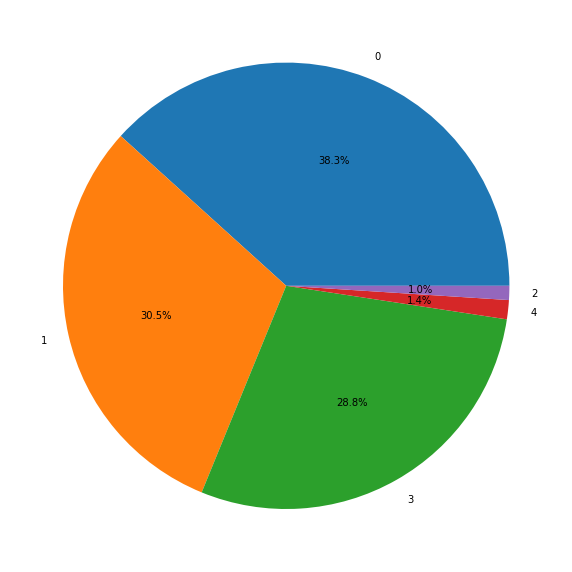

In [29]:
#pie
fig = plt.figure(figsize=(10,20))
plt.pie(data['category'].value_counts().values, 
        labels=data['category'].value_counts().index,
        autopct='%1.1f%%');

In [101]:
df.insert(1, target_feature + "_vector", 0) 
df[target_feature + "_vector"] = df[target_feature + "_vector"].astype(object)

data_ws=df.copy()

# CKIP creator

In [102]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
ws = WS("/home/alissa77/data")
pos = POS("/home/alissa77/data")
ner = NER("/home/alissa77/data")

In [103]:
word_to_weight = {
    "土地公": 1,
    "土地婆": 1,
    "公有": 2,
}
dictionary = construct_dictionary(word_to_weight)
print(dictionary)

[(2, {'公有': 2.0}), (3, {'土地公': 1.0, '土地婆': 1.0})]


# testing dataset 遇到error: 

In [105]:
claim_ws = []
pos=[]
ner=[]

for claim in data_ws['claim']:
    sentence_list = [claim]
    word_sentence_list = ws(
        sentence_list,
        # sentence_segmentation = True, # To consider delimiters
        # segment_delimiter_set = {",", "。", ":", "?", "!", ";", "，"}, # This is the defualt set of delimiters
        recommend_dictionary = dictionary, # words in this dictionary are encouraged
        # coerce_dictionary = dictionary2, # words in this dictionary are forced
    )
    pos_sentence_list = pos(word_sentence_list)
    entity_sentence_list = ner(word_sentence_list, pos_sentence_list)
    
    claim_ws.append(word_sentence_list[0])
    pos.append(word_sentence_list[0])
    ner.append(word_sentence_list[0])

    print(word_sentence_list[0])
    
data_ws['claim'] = claim_ws
data_ws['pos'] = pos
data_ws['ner'] = ner

TypeError: 'list' object is not callable

In [ ]:
### stopwords
stop_words = open('./stops.txt', 'r')
lines = stop_words.readlines()
stop_words_dict = {}
for line in lines:
    line = line.replace('\n','')
    stop_words_dict[line] = 1

In [ ]:
def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
        print(f"{word}({pos})", end="\u3000")
    print()
    return
    
for i, sentence in enumerate(sentence_list):
    print()
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)

In [ ]:
# vectering WS
for idx in range(0, data_ws.shape[0]):
    sys.stdout.write('\r'+ "Implementing BERT vectoring {}% \n".format(round(100 * idx/data_set_filtered_ws.shape[0], 2)))
    title_list = []
    for word in data_set_filtered_ws[target_feature].iloc[idx]:
            vec = bv.encode([word])
            title_list.append(vec)
            data_set_filtered_ws[target_feature + "_vector"].iloc[idx] = title_list

In [ ]:
print(data_set_filtered_ws.shape)
data_set_filtered_ws.to_pickle('test.pkl')